# Test méthode classique de débruitage

## Filtre moyenneur

In [3]:
# Import des modules
import os
import random
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import scipy as scp
from scipy import ndimage

In [ ]:
# Bloc de fonctions utiles 

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Affichage histogramme d'une image
def display_histogram(image):
    plt.figure()
    plt.hist(image.flatten(), bins=256, range=(0,256), density=True, color='black', alpha=0.75)
    plt.title('Histogramme')
    plt.xlabel('Valeurs des pixels')
    plt.ylabel('Fréquence')
    plt.show()


# Afficher une image en niveaux de gris
def display_image(image,title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    #plt.title(title)
    plt.axis('off')
    plt.show()

def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value


In [5]:
h1 = np.ones((3, 3))
h1 = 1/9 * h1

h2 = np.ones((9, 9))
h2 = 1/81 * h2

def convolve2d(image, h):
    # taille de l'image 
    image_height, image_width = image.shape
    # taille du filtre 
    kernel_height, kernel_width = h.shape
    
    # déterminer combien de pixels de remplissage sont nécessaires autour de l'image
    pad_height = kernel_height // 2  # Pour le haut et le bas
    pad_width = kernel_width // 2      # Pour la gauche et la droite

    # remplissage de zéros autour de l'image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    # une image vide qui aura la même taille que l'image d'origine
    output = np.zeros_like(image)
    
    # appliquer le filtre à chaque pixel de l'image
    for i in range(image_height):
        for j in range(image_width):
            # section de l'image qui correspond à la taille du filtre
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # nouveau pixel en effectuant un calcul de moyenne pondérée
            output[i, j] = np.sum(region * h)
    
    return output



[[169 169 169 ... 176 160 133]
 [169 169 169 ... 176 160 133]
 [169 169 169 ... 176 160 133]
 ...
 [ 44  44  51 ... 108 103 102]
 [ 45  45  56 ... 107 109 111]
 [ 45  45  56 ... 107 109 111]]


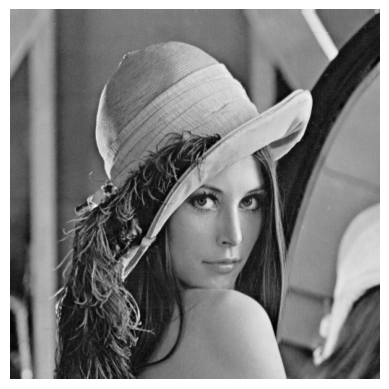

In [6]:
# Bloc de test d'affichage de l'image et de son histogramme

# Importer l'image
image = import_image('lena.pgm')
print(image)
display_image(image,'Image originale')
# display_histogram(image)

[[0.50536101 0.71496469 0.76052522 ... 0.70572307 0.58136476 0.46575595]
 [0.7122855  0.71090301 0.78459427 ... 0.64645862 0.56002245 0.68919921]
 [0.59696496 0.45657661 0.71078257 ... 0.51916793 0.67092856 0.33707315]
 ...
 [0.25820636 0.14759558 0.22797268 ... 0.46061623 0.44607067 0.38607223]
 [0.20859751 0.07492823 0.2619331  ... 0.2320281  0.32439867 0.54424664]
 [0.         0.21322712 0.21898441 ... 0.40829509 0.37206581 0.50767227]]


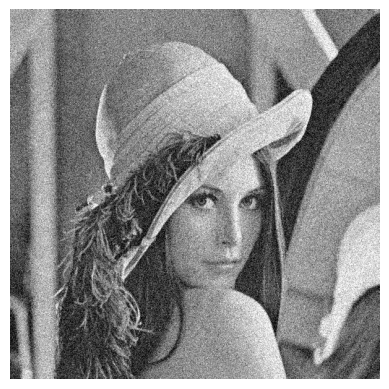

In [7]:
# Ajout de bruit à l'image
image_noised = ski.util.random_noise(image, mean=0, var=0.01)
print(image_noised)
display_image(image_noised,'Image bruitée')

[[ 51  62  73 ...  70  59  48]
 [ 62  75  88 ...  80  68  55]
 [ 71  87 101 ...  90  76  61]
 ...
 [ 25  29  33 ...  54  47  39]
 [ 21  25  27 ...  47  40  34]
 [ 16  19  21 ...  40  34  28]]


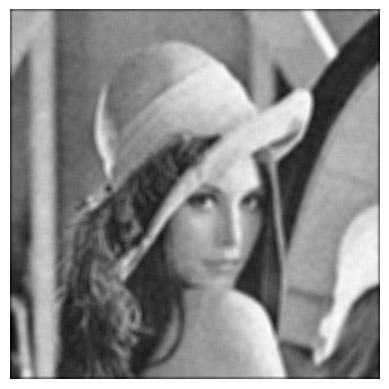

In [8]:
# Bloc de test de la fonction de filtrage

# Appliquer le filtre moyen
image_noised = (image_noised * 255).astype(np.uint8)
filtered_image = convolve2d(image_noised, h2)
print(filtered_image)
display_image(filtered_image,'Image filtrée')

In [9]:
# Test PSNR entre l'image originale et l'image débruitée
psnr_value = psnr(image, image_noised)
print('PSNR entre l\'image originale et l\'image bruitée :', psnr_value)
psnr_value = psnr(image, filtered_image)
print('PSNR entre l\'image originale et l\'image débruitée :', psnr_value)

PSNR entre l'image originale et l'image bruitée : 20.086475521246527
PSNR entre l'image originale et l'image débruitée : 24.461154268062252
